# Исследование тарифных планов для компании «Мегалайн»
Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
В данном проекте мы сделаем предварительный анализ тарифов на небольшой выборке клиентов. У нас есть данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. Описание тарифов:

<b>Тариф «Смарт» </b>
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

<b>Тариф «Ультра» </b>
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

<b>Краткое содержание проекта:</b>
- Изучение общей информации о файлах с данными.
- Изучение каждого столбца и поиск потенциальных ошибок.
- Изменение типов данных.
- Работа над ошибками файла. Заполнение пропусков и исправление ошибок.
- Анализ данных.
- Выводы и поиск ответов на основные вопросы, поставленных в проекте.
- Общий вывод.
- Чек-лист проекта.

<b>Автор проекта:</b> 
- Виктория Кускова, 
- студентка Яндекс.Практикума, кагорты DS20.

## Шаг: Открытие файлов с данными и изучение общей информации

Сначала скачаем данные и посмотрим на общую информацию.

In [1]:
#импорты библиотек и ключевые константы для проекта
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

all_months = pd.DataFrame({'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})
alpha = 0.05

In [2]:
#импорт файлов с данными
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
#общая информация calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
#общая информация internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
#общая информация messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
#общая информация tariffs
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
#общая информация users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Обнаружены пропуски всего в одном столбце в таблице users: 
- churn_date, что означает дату прекращения пользования тарифом. 

Но это логично, что тут есть пропуск. Так как если, клиент все еще пользуется тарифом там и ничего не должно быть.

Также видим, что самые тяжелые и большие таблицы - со звонками и трафиком по интернету: 202 тыс и 149 тыс строк, 6.2 MB и 5.7 MB соответственно. Таблица по сообщениям тоже достаточно тяжелая: 123 тыс строк и 2.8 MB. 

А общие данные по тарифам и пользователям досточно легкие: 2 и 500 строк, 256 байт и 31.4 KB.

Четыре таблицы: users, calls, internet, messages  можно связать через столбец user_id, а оставшуюся таблицу с тарифами tariffs можно связать с таблицей users по столбцам tariff_name и tariff.

Посмотрим теперь на сами таблицы.

### Таблица "calls"

In [8]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [9]:
len(calls['id'].unique())

202607

In [10]:
calls['call_date'].max()

'2018-12-31'

In [11]:
calls['call_date'].min()

'2018-01-01'

Дубликатов по id звонков нет.

Данные у нас ровно за 1 год: 2018.

По первым пяти строкам видны нули по времени звонка в минутах, нужно подробнее проработать этот момент.

In [12]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

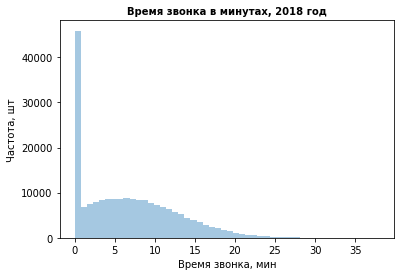

In [13]:
plt.title("Время звонка в минутах, 2018 год", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=calls['duration'], kde=False, rug=False, axlabel="Время звонка, мин")
plt.show()

Пик около 0 явно выглядит подозрительно. Это нужно учесть в обработке данных. Как вариант:
- Изучить подробнее, возможно это пропущенные вызовы, возможно игнорировать при анализе.
- Возможно заполнить эту ошибку, к примеру, исходя из средней продолжительности звонка клиента. Если подтвердится, что это ошибка.

### Таблица "internet"

In [14]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [15]:
len(internet['id'].unique())

149396

In [16]:
internet['session_date'].max()

'2018-12-31'

In [17]:
internet['session_date'].min()

'2018-01-01'

In [18]:
internet.groupby(by=['session_date','user_id'])['id'].count().unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 13, 11, 18, 20, 29, 32, 58,
       50, 19])

Дубликатов по id звонков нет.

Данные у нас ровно за 1 год: 2018.

Число сессий интернета для активных пользователей за сутки варируется от 1 до 58. Этим действием мы вообще проверили тот факт, что данные представлены не в агрегированном виде суммы всего трафика за день, а именно в данных есть детализация до сессий за день.

По первым пяти строкам видно, что у нас есть кажется лишний столбец 'Unnamed: 0'. Скорее всего это индекс изначальной таблицы. Проверим:

In [19]:
len(internet['Unnamed: 0'].unique())

149396

In [20]:
internet['Unnamed: 0'].max()

149395

In [21]:
internet['Unnamed: 0'].min()

0

Из общей информации по столбцу мы знаем, что тип у данного столбца: целые числа. Минимум - 0, Максимум - 149395. Все они уникальные. Это доказывает, что в этом столбце пробегаются все числа в этом промежутке. Это точно дубликат индекса. Данный столбец для нас неинформативен, его можно удалить или просто не использовать в дальнейших операциях и анализе.

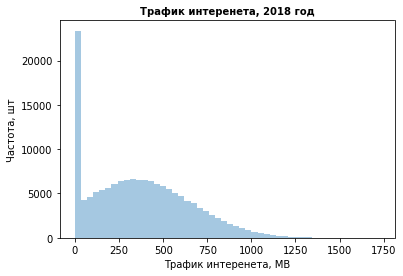

In [22]:
plt.title("Трафик интеренета, 2018 год", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=internet['mb_used'], kde=False, rug=False, axlabel="Трафик интеренета, MB")
plt.show()

Также как и со звонками есть аномальный пик в 0. С ним тоже нужно разобраться.

### Таблица "messages"

In [23]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [24]:
len(messages['id'].unique())

123036

In [25]:
messages['message_date'].max()

'2018-12-31'

In [26]:
messages['message_date'].min()

'2018-01-02'

Видно, что не хватает данных за 1 января. Возможно и по звонкам, и трафику пропуски связаны с определенными датами. Проверим есть ли еще даты, по которым потерялись сообщения.

In [27]:
len(messages['message_date'].unique())

364

Нет, это только первое января. Но предположение о потере данных в определнные дни запомним.

### Таблица "tariffs"

In [28]:
tariffs.T

,0,1
messages_included,50,1000
mb_per_month_included,15360,30720
minutes_included,500,3000
rub_monthly_fee,550,1950
rub_per_gb,200,150
rub_per_message,3,1
rub_per_minute,3,1
tariff_name,smart,ultra


Отлично, все необходимые параметры по тарифам.

### Таблица "users"

In [29]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [30]:
len(users['user_id'].unique())

500

In [31]:
users['reg_date'].max()

'2018-12-31'

In [32]:
users['reg_date'].min()

'2018-01-01'

In [33]:
users.query('churn_date.notnull()')['user_id'].count()

38

In [34]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [35]:
users['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Дубликов по id пользователей нет. К сожалению, это означает, что тут нет пользователей, у которых были разные тарифы в 2018 году. Вероятно те 38 человек с датой окончания тарифа - ушли от нашего оператора, к сожалению. Ниже просто посмотрим на информацию по некоторым из них для ознакомления.

Также понятно, что у нас выборка пользователей, кому применили тарифы в 2018 году. Будем это помнить.

Из других данных - это город, видим, что представлены многие крупные города. Выше проверили, что все названия городов похожи на настоящие. Еще можно посмотреть что творится в разных группах по возрастам. А вот на ФИО смотреть не будем, это ведь и не очень корректно, и реальной жизни пользователи обычно обезличены.

In [36]:
users.query('churn_date.notnull()').head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


Еще интересно посмотреть на то, как много людей подключились к каждому из тарифов.

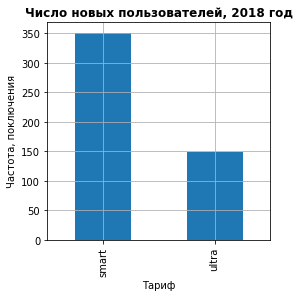

In [37]:
users.pivot_table(index='tariff', values='user_id', aggfunc='count').plot(
    grid=True, figsize=(4,4), kind='bar', legend=False
)
plt.title("Число новых пользователей, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, поключения")
plt.xlabel("Тариф")
plt.show()

Видим, что тариф smart популярнее больше чем в 2 раза! 350 подключений к 150 у ultra.

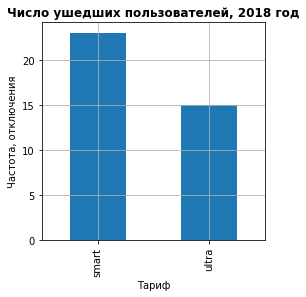

In [38]:
users.query('churn_date.notnull()').pivot_table(index='tariff', values='user_id', aggfunc='count').plot(
    grid=True, figsize=(4,4), kind='bar', legend=False
)
plt.title("Число ушедших пользователей, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, отключения")
plt.xlabel("Тариф")
plt.show()

А вот отключения происходят в более равных пропорциях. Из 38 пользователей 23 ушли со smart, и 15 c ultra. 6,5% и 10% доля уходов от новых подключений за 2018 год соответственно. Важное наблюдение.

### Вывод по шагу

Итого:
- Обнаружены пропуски всего в одном столбце в таблице users: churn_date, что означает дату прекращения пользования тарифом. Не будем заполнять данный пропуск.
- Самые тяжелые и большие таблицы - со звонками и трафиком по интернету: 202 тыс и 149 тыс строк, 6.2 MB и 5.7 MB соответственно. Таблица по сообщениям тоже достаточно тяжелая: 123 тыс строк и 2.8 MB. 
- Общие данные по тарифам и пользователям досточно легкие: 2 и 500 строк, 256 байт и 31.4 KB.


- Четыре таблицы: users, calls, internet, messages  можно связать через столбец user_id, а оставшуюся таблицу с тарифами tariffs можно связать с таблицей users по столбцам tariff_name и tariff.


- Данные по всем таблицам у нас ровно за 1 год: 2018. Даже понятно, что у нас выборка новых пользователей, кому применили тарифы в 2018 году. Будем это помнить.
- Дубликатов нет.
- Есть выделяющиеся данные по звонках - 0.0 мин. Их нужно изучить подробнее, возможно исправить, возможно игнорировать при анализе.
- Есть выделяющиеся данные по интернету - 0.0 MB. Их нужно изучить подробнее, возможно исправить, возможно игнорировать при анализе.
- Нет информации по сообщеним за 1 января 2018 года.
- Есть лишний столбец в данных по интернету: 'Unnamed: 0', его можно удалить или просто игнорировать.
- Нет пользователей, у которых были разные тарифы в 2018 году. Вероятно те 38 человек с датой окончания тарифа - ушли от нашего оператора, к сожалению.
- Smart популярнее больше чем в 2 раза! 350 подключений к 150 у ultra.
- А вот отключаются пользователи уже в более равных долях. Из 38 пользователей 23 ушли со smart, и 15 c ultra. 6,5% и 10% доля уходов от новых подключений за 2018 год соответственно.

Продолжим работу!

## Шаг: Подготовка данных

### Приведение данных к нужным типам

Пройдемся по таблицам и исправим тип данных по столбцам на более оптимальный. А также добавим новые столбцы, которые будут полезны нам для анализа.

Также вспомним, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Это означает, что мы можем округлить наши значения вверх сейчас и привести их к целочисленным типам данных.

#### Изменение типов, "calls"

In [39]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [40]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


До преобразований больше 6 MB. Тут нужно будет поработать над числовыми столбцами, со столбцом типа object с датой. C столбцом 'id' нничего не будем делать, тут слишком много уникальных значений. Начнем с числовых, а сначала округлим значения по прололжительности разговоров.

In [41]:
calls['duration'] = np.ceil(calls['duration'])

In [42]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Значения округлились, переходим к анализу потенциальных типов данных.

In [43]:
calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,7.158198,5.959173,0.0,2.0,6.0,11.0,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Посмотрев на минимальные и максимальные значения, можно определить следующий новый тип для наших столбцов:

- duration: теперь, округлив до целых значений можем взять даже тип int8;
- user_id: тут хватит int16.

In [44]:
calls['duration'] = np.int8(calls['duration'])
calls['user_id'] = np.int16(calls['user_id'])

In [45]:
calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,7.158198,5.959173,0.0,2.0,6.0,11.0,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Основные показатели (среднее, отклонение) остались такими же. Замена прошла успешно.

Преобразуем дату и добавим новый столбец. Столбец 'id' трогать не будем.

In [46]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [47]:
calls['month'] = calls['call_date'].dt.month

In [48]:
calls['month'] = np.int8(calls['month'])

In [49]:
calls.head(3)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6


Успешно, проверим сколько теперь весит таблица, ведь мы даже добавили столбец.

In [50]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int8
user_id      202607 non-null int16
month        202607 non-null int8
dtypes: datetime64[ns](1), int16(1), int8(2), object(1)
memory usage: 3.9+ MB


Было 6,2, а стало 3,9. Целых 2.3 MB ушло, это хорошо.

#### Изменение типов, "internet"

In [51]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [52]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Удалим первый столбец, оптимизируем числовые исходя из макс и мин значений. Преобразуем дату и добавим новый столбец. Столбец 'id' трогать не будем. Но сначала округлим значения MB.

In [53]:
internet['mb_used'] = np.ceil(internet['mb_used'])

In [54]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000


Округление прошло успешно.

In [55]:
internet.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
internet.describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.622098,278.387019,0.0,139.0,349.0,560.0,1725.0
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0,1251.0,1380.0,1499.0


In [57]:
internet['mb_used'] = np.int16(internet['mb_used'])
internet['user_id'] = np.int16(internet['user_id'])

In [58]:
internet.describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.622098,278.387019,0.0,139.0,349.0,560.0,1725.0
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0,1251.0,1380.0,1499.0


Основные показатели (среднее, отклонение) остались такими же. Замена прошла успешно.

Теперь к дате. Переведем в нужный формат и выделим день недели и месяц. Год не будем выделять так как он всего один у нас - 2018.

In [59]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [60]:
internet['month'] = internet['session_date'].dt.month
internet['month'] = np.int8(internet['month'])

In [61]:
internet.head(3)

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6


In [62]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null int16
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int16
month           149396 non-null int8
dtypes: datetime64[ns](1), int16(2), int8(1), object(1)
memory usage: 3.0+ MB


Было 5,7, а стало 3.0! 2.7 MB ушло, отлично!

#### Изменение типов, "messages"

In [63]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Поработаем с датой и числовым столбцом.

In [64]:
messages['user_id'] = np.int16(messages['user_id'])

In [65]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [66]:
messages['month'] = messages['message_date'].dt.month
messages['month'] = np.int8(messages['month'])

In [67]:
messages.head(3)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8


In [68]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int16
month           123036 non-null int8
dtypes: datetime64[ns](1), int16(1), int8(1), object(1)
memory usage: 2.2+ MB


Ушла почти половина мегабайта (2.8 и 2.2).

#### Изменение типов, "tariffs"

Да, в ней всего 2 строки. И ее не нужно оптимизировать настолько. Но так как для таблицы users у пересекающего столбца мы поменяем тип. То и тут это логично сделать.

In [69]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [70]:
tariffs['tariff_name'] = tariffs['tariff_name'].astype('category')

In [71]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Изменение типов, "users"

Для этой таблицы также. Изменим только ключевые столбцы.

In [72]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [73]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [74]:
users['tariff'] = users['tariff'].astype('category')

In [75]:
users['user_id'] = np.int16(users['user_id'])

In [76]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [77]:
users['reg_month'] = users['reg_date'].dt.month
users['churn_month'] = users['churn_date'].dt.month
users['reg_month'] = np.int8(users['reg_month'])
users['churn_month'] = np.int8(users['churn_month'])

И добавим также столбец с группой возраста, по которому мы хотели провести анализ.

In [78]:
#создаем функцию для категоризации по возрасту
def age_group(years):
    if years < 36:
        return 'молодежь'
    elif years < 55:
        return 'взрослые'
    else:
        return 'пожилые'
    
#добавляем новый столбец с новой категорией
users['age_group'] = users['age'].apply(age_group)
users['age_group'] = users['age_group'] .astype('category')

In [79]:
users['age_group'].value_counts()

пожилые     177
взрослые    177
молодежь    146
Name: age_group, dtype: int64

Посмотрели на общее распределение групп - порядок очень похожий, группы равны по размеру. Это хорошо, проверим общую информацию по таблице после преобразований.

In [80]:
users.info()
users.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
user_id        500 non-null int16
age            500 non-null int64
churn_date     38 non-null datetime64[ns]
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_date       500 non-null datetime64[ns]
tariff         500 non-null category
reg_month      500 non-null int8
churn_month    500 non-null int8
age_group      500 non-null category
dtypes: category(2), datetime64[ns](2), int16(1), int64(1), int8(2), object(3)
memory usage: 26.7+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,age_group
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0,взрослые
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,0,взрослые
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,0,пожилые
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,0,молодежь
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,0,пожилые


Переходим к следующим шагам.

#### Таблица all_months

Также в начале проекта мы создали таблицу с перечнем всех месяцев. Она потребуется нам дальше. Давайте попробуем и ее оптимизировать.

In [81]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
month    12 non-null int64
dtypes: int64(1)
memory usage: 224.0 bytes


In [82]:
all_months['month'] = np.int8(all_months['month'])

In [83]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
month    12 non-null int8
dtypes: int8(1)
memory usage: 140.0 bytes


Успех!

### Исправление ошибок в данных
Посмотрим на подозрительные данные, которые мы нашли и как их можно исправить:
- Есть выделяющиеся данные по звонках - 0.0 мин. Их нужно изучить подробнее, возможно исправить, возможно игнорировать при анализе.
- Есть выделяющиеся данные по интернету - 0.0 MB. Их нужно изучить подробнее, возможно исправить, возможно игнорировать при анализе.
- Нет информации по сообщеним за 1 января 2018 года.

In [84]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


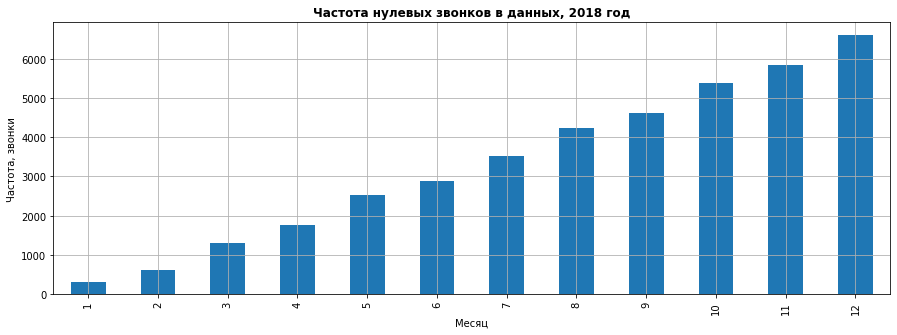

In [85]:
calls.query('duration == 0').pivot_table(index='month', values='id', aggfunc='count').plot(
    grid=True, figsize=(15,5), kind='bar', legend=False
)
plt.title("Частота нулевых звонков в данных, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, звонки")
plt.xlabel("Месяц")
plt.show()

Частота нулевых звонков неравномерна и растёт. Сравним с общим числом ненулевых звонков.

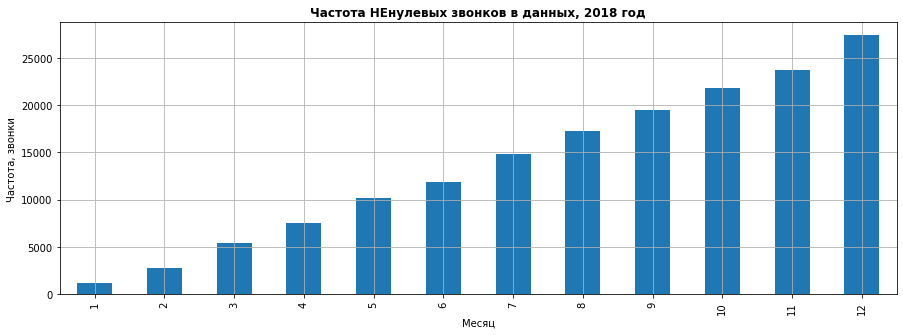

In [86]:
calls.query('duration != 0').pivot_table(index='month', values='id', aggfunc='count').plot(
    grid=True, figsize=(15,5), kind='bar', legend=False
)
plt.title("Частота НЕнулевых звонков в данных, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, звонки")
plt.xlabel("Месяц")
plt.show()

Действительно, ведь наша выборка данных - это только клиенты, присоединившиеся за 2018. И тогда число активных пользователей, число звоноков в этой выборке растет с каждым месяцем.

Тогда понятно почему сообщений нет за 01.01. Тогда могли писать сообщения только клиенты поключившиеся в этот день, а он обычно начинается поздно и много магазинов не работает. Поэтому их не так и много. Также есть предположение, что использование сообщений - не самая популярная услуга среди пользователей. Посмотрим на распределение числа сообщений.

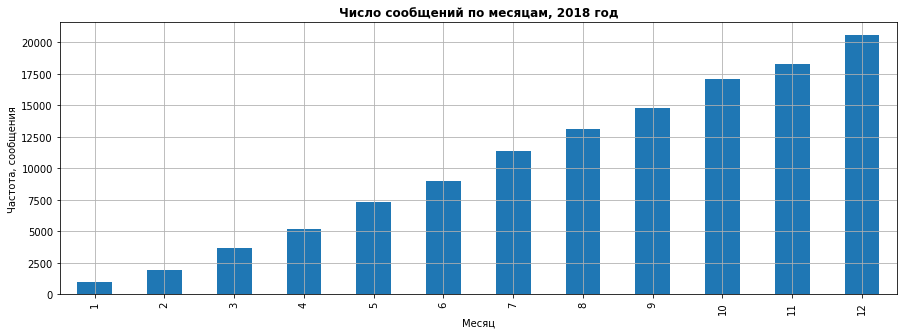

In [87]:
messages.pivot_table(index='month', values='id', aggfunc='count').plot(
    grid=True, figsize=(15,5), kind='bar', legend=False
)
plt.title("Число сообщений по месяцам, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, сообщения")
plt.xlabel("Месяц")
plt.show()

Теперь проверим также ведет ли себя столбец с нулевыми сессиями интернета, как и нулевые звонки.

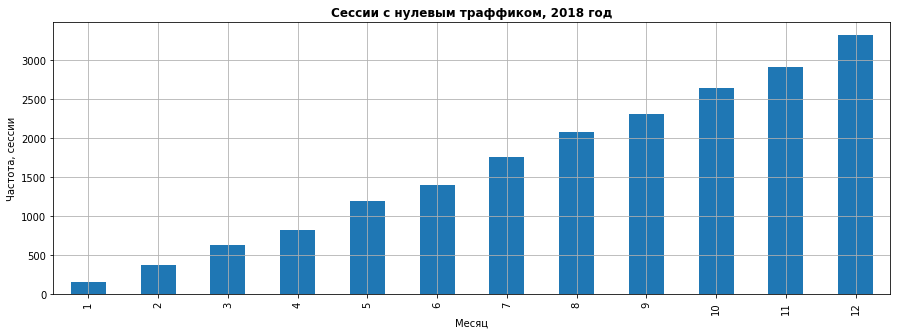

In [88]:
internet.query('mb_used == 0').pivot_table(index='month', values='id', aggfunc='count').plot(
    grid=True, figsize=(15,5), kind='bar', legend=False
)
plt.title("Сессии с нулевым траффиком, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, сессии")
plt.xlabel("Месяц")
plt.show()

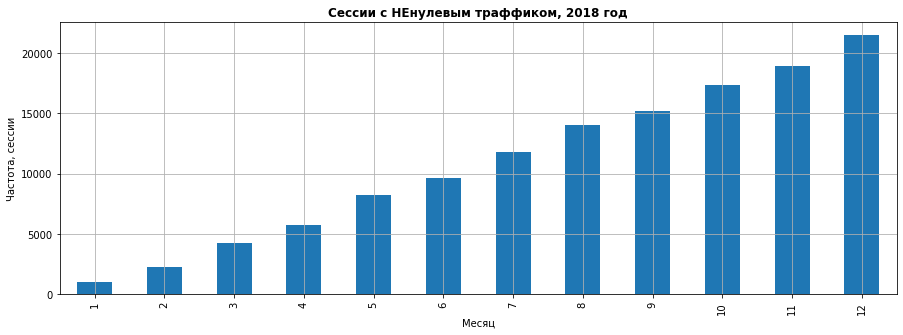

In [89]:
internet.query('mb_used != 0').pivot_table(index='month', values='id', aggfunc='count').plot(
    grid=True, figsize=(15,5), kind='bar', legend=False
)
plt.title("Сессии с НЕнулевым траффиком, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, сессии")
plt.xlabel("Месяц")
plt.show()

Наши ошибки: нулевые сессии интернета и звонки нулевой длительности распределены также, как и обычные сессии и звонки. Возможные причины появления таких нулевых данных:

- Звонки с 0 длительностью могут быть неотвеченные звонки, или звонки, когда у абонента нет связи и вызов не происходит. 
- Сессии интернета также могут быть лишь попыткой к подключению, но в момент отсутствия сигнала.
- Клиент мог не подключить настройки интеренета в роуминге и поэтому сессия оборвалась, не начавшись.
- Или клиент мог настроить режим ограничения трафика на самом телефоне.

Эти причины лишь возможные. Что мы можем сказать наверняка - что точного понимания как заполнить эти вылеты у нас нет, а скорее есть понимание, что 0 тут не случайно. Они распределены также как и хорошие данные. Поэтому лучше данные пропуски/ошибки не удалять и не менять, но и для части расчетов лучше не использовать.

### Добавление новой информации
Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Но сначала для этого создадим базовую таблицу, к которой и будем все подтягивать.

#### Создание базавой таблицы

А именно сохраним все возможные комбинации user_id и возможных месяцев. Для этого нам пригодится глобальная таблица all_months, которую мы создали в начале проекта.

А user_id возьмем из таблицы users, добавив также нужную нам информацию. А ненужную по уберем. Если что - всегда сможем добавить из исходной таблицы с информацией по users.

In [90]:
data = users.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1)

In [91]:
data.head()

,user_id,city,tariff,reg_month,churn_month,age_group
0,1000,Краснодар,ultra,5,0,взрослые
1,1001,Москва,smart,11,0,взрослые
2,1002,Стерлитамак,smart,6,0,пожилые
3,1003,Москва,ultra,8,0,молодежь
4,1004,Новокузнецк,ultra,5,0,пожилые


In [92]:
#создаем 2 временных столбца для перемножения таблиц
data['tmp'] = 1
all_months['tmp'] = 1

data = pd.merge(data, all_months, on=['tmp'])
data.head()

,user_id,city,tariff,reg_month,churn_month,age_group,tmp,month
0,1000,Краснодар,ultra,5,0,взрослые,1,1
1,1000,Краснодар,ultra,5,0,взрослые,1,2
2,1000,Краснодар,ultra,5,0,взрослые,1,3
3,1000,Краснодар,ultra,5,0,взрослые,1,4
4,1000,Краснодар,ultra,5,0,взрослые,1,5


In [93]:
#удаляем временный столбец
data.drop('tmp', axis=1, inplace=True)

In [94]:
data.head()

,user_id,city,tariff,reg_month,churn_month,age_group,month
0,1000,Краснодар,ultra,5,0,взрослые,1
1,1000,Краснодар,ultra,5,0,взрослые,2
2,1000,Краснодар,ultra,5,0,взрослые,3
3,1000,Краснодар,ultra,5,0,взрослые,4
4,1000,Краснодар,ultra,5,0,взрослые,5


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 7 columns):
user_id        6000 non-null int16
city           6000 non-null object
tariff         6000 non-null category
reg_month      6000 non-null int8
churn_month    6000 non-null int8
age_group      6000 non-null category
month          6000 non-null int8
dtypes: category(2), int16(1), int8(3), object(1)
memory usage: 135.0+ KB


6000 строк - это как раз произведение 500 и 12. Базовая таблица готова, теперь к ней подтянем нужную информацию.

#### Информация по звонкам

Так как до этого мы выяснили, что есть и нулевые звонки, то количество звонков корректно считать без них.

In [96]:
calls_info = calls.query('duration.notnull()').pivot_table(
    index=['user_id','month'], values='duration', aggfunc=['sum','count']
).reset_index()

calls_info.columns = ['user_id','month','calls_duration','calls_count']

calls_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id           3174 non-null int64
month             3174 non-null int64
calls_duration    3174 non-null float64
calls_count       3174 non-null int64
dtypes: float64(1), int64(3)
memory usage: 99.3 KB


In [97]:
calls_info.head()

,user_id,month,calls_duration,calls_count
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58


In [98]:
data = pd.merge(data, calls_info, how='outer')
data.head()

,user_id,city,tariff,reg_month,churn_month,age_group,month,calls_duration,calls_count
0,1000,Краснодар,ultra,5,0,взрослые,1,NaN,NaN
1,1000,Краснодар,ultra,5,0,взрослые,2,NaN,NaN
2,1000,Краснодар,ultra,5,0,взрослые,3,NaN,NaN
3,1000,Краснодар,ultra,5,0,взрослые,4,NaN,NaN
4,1000,Краснодар,ultra,5,0,взрослые,5,159.0,22.0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 9 columns):
user_id           6000 non-null int16
city              6000 non-null object
tariff            6000 non-null category
reg_month         6000 non-null int8
churn_month       6000 non-null int8
age_group         6000 non-null category
month             6000 non-null int8
calls_duration    3174 non-null float64
calls_count       3174 non-null float64
dtypes: category(2), float64(2), int16(1), int8(3), object(1)
memory usage: 228.7+ KB


Отлично, подтянули данные по звонкам к нашей общей таблице. Теперь также поступим с сообщениями и интернетом.

#### Информация по интеренету

Мы знаем, что есть нулевые сессии, но на общую сумму трафика они не повлияют. Поэтому при агрегации можем и не отбрасывать эти значения.

In [100]:
internet_info = internet.pivot_table(
    index=['user_id','month'], values='mb_used', aggfunc='sum'
).reset_index()

internet_info.columns = ['user_id','month','internet_mb_used']

internet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id             3203 non-null int64
month               3203 non-null int64
internet_mb_used    3203 non-null float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


In [101]:
internet_info.head()

,user_id,month,internet_mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


In [102]:
data = pd.merge(data, internet_info, how='outer')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 10 columns):
user_id             6000 non-null int16
city                6000 non-null object
tariff              6000 non-null category
reg_month           6000 non-null int8
churn_month         6000 non-null int8
age_group           6000 non-null category
month               6000 non-null int8
calls_duration      3174 non-null float64
calls_count         3174 non-null float64
internet_mb_used    3203 non-null float64
dtypes: category(2), float64(3), int16(1), int8(3), object(1)
memory usage: 275.6+ KB


Успех, продолжаем.

#### Информация по сообщениям

In [103]:
messages_info = messages.pivot_table(
    index=['user_id','month'], values='id', aggfunc='count'
).reset_index()

messages_info.columns = ['user_id','month','messages_count']

messages_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id           2717 non-null int64
month             2717 non-null int64
messages_count    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


In [104]:
messages_info.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [105]:
data = pd.merge(data, messages_info, how='outer')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 11 columns):
user_id             6000 non-null int16
city                6000 non-null object
tariff              6000 non-null category
reg_month           6000 non-null int8
churn_month         6000 non-null int8
age_group           6000 non-null category
month               6000 non-null int8
calls_duration      3174 non-null float64
calls_count         3174 non-null float64
internet_mb_used    3203 non-null float64
messages_count      2717 non-null float64
dtypes: category(2), float64(4), int16(1), int8(3), object(1)
memory usage: 322.5+ KB


Отлично! И уже видно по таблице, что самая популярная услуга - интеренет. Месяцов (точнее комбинаций клиент-месяц), когда ей пользовались клиенты больше всего (3202)! А самая невостребованная - сообщения (2717). 

#### Информация по тарифам

Также сразу добавим информацию по тарифам. Неоходимую для наших расчетов.

In [106]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [107]:
data = pd.merge(data, tariffs, left_on='tariff', right_on='tariff_name')
data.drop('tariff_name', axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 18 columns):
user_id                  6000 non-null int16
city                     6000 non-null object
tariff                   6000 non-null category
reg_month                6000 non-null int8
churn_month              6000 non-null int8
age_group                6000 non-null category
month                    6000 non-null int8
calls_duration           3174 non-null float64
calls_count              3174 non-null float64
internet_mb_used         3203 non-null float64
messages_count           2717 non-null float64
messages_included        6000 non-null int64
mb_per_month_included    6000 non-null int64
minutes_included         6000 non-null int64
rub_monthly_fee          6000 non-null int64
rub_per_gb               6000 non-null int64
rub_per_message          6000 non-null int64
rub_per_minute           6000 non-null int64
dtypes: category(2), float64(4), int16(1), int64(7), int8(3), object(1)

#### Отбрасывание лишних строк

А теперь пришло время отбросить не нужные строки. А именно те строки по месяцам, когда клиенты еще не начали пользоваться нашим тарифом. И когда уже закончили.

In [108]:
data.drop(data[data.month < data.reg_month].index, inplace=True)
data.drop(data[(data.month > data.churn_month)&(data.churn_month != 0)].index, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 4 to 5999
Data columns (total 18 columns):
user_id                  3216 non-null int16
city                     3216 non-null object
tariff                   3216 non-null category
reg_month                3216 non-null int8
churn_month              3216 non-null int8
age_group                3216 non-null category
month                    3216 non-null int8
calls_duration           3174 non-null float64
calls_count              3174 non-null float64
internet_mb_used         3203 non-null float64
messages_count           2717 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: category(2), float64(4), int16(1), int64(7), int8(3), object(1)

Теперь важный момент относительно пропущеггых значений в агрегированной таблице. Если клиент вообще не звонил или не отправлял сообщений - это не избавляет его от абоненской платы. Поэтому эти значения корректно заполнить нулями.

In [109]:
data.loc[data['calls_duration'].isnull(), 'calls_duration'] = 0
data.loc[data['calls_count'].isnull(), 'calls_count'] = 0
data.loc[data['internet_mb_used'].isnull(), 'internet_mb_used'] = 0
data.loc[data['messages_count'].isnull(), 'messages_count'] = 0

Также я бы хотела добавить столбец с указанием является ли месяц первый или последний в рамках использования тарифа. Для определенной аналитики важно смотреть на информацию без этих месяцев.

In [110]:
#создаем функцию для категоризации по месяцу использования
def month_group(month, reg_month, churn_month):
    if month == reg_month:
        return 'первый'
    elif month == churn_month:
        return 'последний'
    return 'другой'
    
#добавляем новый столбец с новой категорией
data['month_group'] = data.apply(lambda x: month_group(x['month'], x['reg_month'], x['churn_month']), axis=1)
data['month_group'] = data['month_group'].astype('category')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 4 to 5999
Data columns (total 19 columns):
user_id                  3216 non-null int16
city                     3216 non-null object
tariff                   3216 non-null category
reg_month                3216 non-null int8
churn_month              3216 non-null int8
age_group                3216 non-null category
month                    3216 non-null int8
calls_duration           3216 non-null float64
calls_count              3216 non-null float64
internet_mb_used         3216 non-null float64
messages_count           3216 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
month_group              3216 non-null category
dtypes: category(3), fl

In [112]:
data.head()

,user_id,city,tariff,reg_month,churn_month,age_group,month,calls_duration,calls_count,internet_mb_used,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_group
4,1000,Краснодар,ultra,5,0,взрослые,5,159.0,22.0,2256.0,22.0,1000,30720,3000,1950,150,1,1,первый
5,1000,Краснодар,ultra,5,0,взрослые,6,172.0,43.0,23257.0,60.0,1000,30720,3000,1950,150,1,1,другой
6,1000,Краснодар,ultra,5,0,взрослые,7,340.0,47.0,14016.0,75.0,1000,30720,3000,1950,150,1,1,другой
7,1000,Краснодар,ultra,5,0,взрослые,8,408.0,52.0,14070.0,81.0,1000,30720,3000,1950,150,1,1,другой
8,1000,Краснодар,ultra,5,0,взрослые,9,466.0,58.0,14581.0,57.0,1000,30720,3000,1950,150,1,1,другой


Пропуски заполнили, переходим к расчету выручки.

#### Расчет выручки

Добавим выручку, посчитав значение на основе других столбцов.

In [113]:
#добавляем новый столбец с перерасход округляем в большую сторону

data['revenue'] = (
    data['rub_monthly_fee'] +
    (np.ceil(np.maximum((data['messages_count'] - data['messages_included']),0))) * data['rub_per_message'] + 
    (np.ceil(np.maximum(data['calls_duration'] - data['minutes_included'],0))) * data['rub_per_minute'] +
    (np.ceil(np.maximum(data['internet_mb_used'] - data['mb_per_month_included'],0) / 1024))* data['rub_per_gb']
)

Добавили столбец, посмотрим предварительно на него.

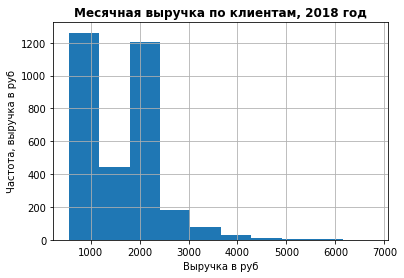

In [114]:
data['revenue'].hist()
plt.title("Месячная выручка по клиентам, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, выручка в руб")
plt.xlabel("Выручка в руб")
plt.show()

Видим 2 пика: около 550 руб и 1950 руб. Это как раз абоненская плата на 2 тарифах. После первого пика есть хвост, вероятно некоторые пользователи первого тарифа smart часто перерасходуют лимит. А вот после второго пика такого ощутимого хвоста нет. Значений в хвосте меньше. Значит скорее всего большиству тарифа ultra хватает.

Посмотрим на данные внимательнее в следующем шаге.

## Шаг: Анализ данных
На этом шаге мы опишем поведение клиентов оператора, исходя из имеющейся выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

Для начала создадим срезу данных по тарифам. Создадим их с учетом первых и последних месяцев и без. Без первых и последних месяцев создадим еще и общий срез данных.

In [115]:
#создание срезов данных
data_smart = data.query('tariff == "smart"').reset_index()
data_smart_short = data.query('tariff == "smart" and month_group == "другой"').reset_index()
data_ultra = data.query('tariff == "ultra"').reset_index()
data_ultra_short = data.query('tariff == "ultra" and month_group == "другой"').reset_index()

data_short = data.query('month_group == "другой"').reset_index()

### Анализ расхода минут

Посмотрим внимательнее на расходуемые минуты разговора. И сравним их со влюченными минутами.

In [116]:
data_smart['calls_duration'].describe()

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: calls_duration, dtype: float64

In [117]:
data_smart_short['calls_duration'].describe()

count    1857.000000
mean      453.003770
std       176.314672
min         0.000000
25%       332.000000
50%       454.000000
75%       564.000000
max      1435.000000
Name: calls_duration, dtype: float64

Ух ты медиана почти сопвпала со средним значением: 427 мин и 428.

In [118]:
data_smart['minutes_included'].mean()

500.0

Среднее значение действительно близко к 500, лимиту. особенно если смотреть на данные без крайних месяцев. А стандартное отклониние примерно 176 по очищенным данным. И оно действительно уменьшилось относительно неочищенных. Посмотрим еще и на дисперсию по очищенным данным, и на график распределения.

In [119]:
np.var(data_smart_short['calls_duration'])

31070.123302968957

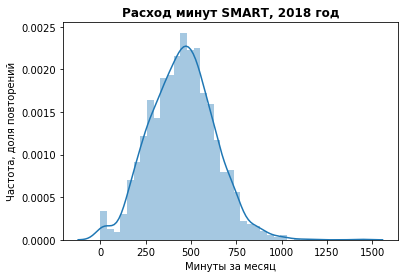

In [120]:
plt.title("Расход минут SMART, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, доля повторений")

sns.distplot(a=data_smart_short['calls_duration'], kde=True, rug=False, axlabel="Минуты за месяц")
plt.show()

У тарифа Smart с количеством минут все хорошо. В 500 минутах находится примерный пик расходов минут пользователями. А медиана и среднее почти совпадают и тоже находятся около 500: 453 и 454 минут соотвественно.

И конечно мы видим, что распредление очень похоже на нормальное распределение. Это хорошо и показывает правдоподобность данных.

Перейдем к тарифу ultra.

In [121]:
data_ultra['calls_duration'].describe()

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: calls_duration, dtype: float64

In [122]:
data_ultra_short['calls_duration'].describe()

count     823.000000
mean      572.928311
std       307.242082
min         0.000000
25%       346.500000
50%       565.000000
75%       779.000000
max      1673.000000
Name: calls_duration, dtype: float64

In [123]:
data_ultra['minutes_included'].mean()

3000.0

Абсолютно противоположная картина с тарифом ultra. Среднее относительно ненамного превосходит среднее в тарифе smart (на 25%), а вот включенные минуты в 6 раз при этом больше. Даже максимум расхода минут в 2 раза меньше лимита.

Посчитаем еще и дисперсию. Напомню, что среднее, медиана и стандартное отклонение мы уже увидели через describe().

In [124]:
np.var(data_ultra_short['calls_duration'])

94282.99729082912

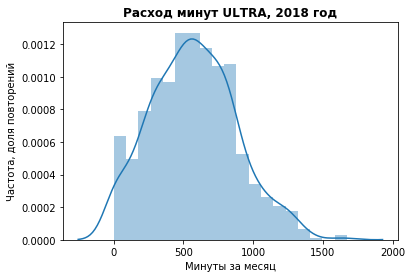

In [125]:
plt.title("Расход минут ULTRA, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, доля повторений")

sns.distplot(a=data_ultra_short['calls_duration'], kde=True, rug=False, axlabel="Минуты за месяц")
plt.show()

Медиана опять близка к среднему (565 и 572), а пик распределения расхода минут находится также примерно у 600 мин. Их и нужно рекомендовать для установки базовых на данный тариф. Это повысит удовлетворенность клиентов. Теперь становится понятнее почему с этого тарифа чаще уходили.

Зафиксируем ключевые показатели по <b>расходу минут</b> (берем очищенные данные):
- Smart: среднее 453 мин, медиана 454 минут, 31070 дисперсия минут в квадрате, стандартное отклонение 176 мин.
- Ultra: среднее 572 мин, медиана 565 минут, 94282 дисперсия минут в квадрате, стандартное отклонение 307 мин.

Теперь посмотрим немного на общие очищенные данные и как они распределяются между возрастных групп.

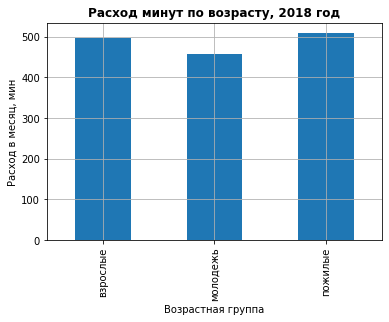

In [126]:
data_short.pivot_table(index='age_group', values='calls_duration').plot(
    grid=True, figsize=(6,4), kind='bar', legend=False
)
plt.title("Расход минут по возрасту, 2018 год", fontweight='bold', size='large')
plt.ylabel("Расход в месяц, мин")
plt.xlabel("Возрастная группа")
plt.show()

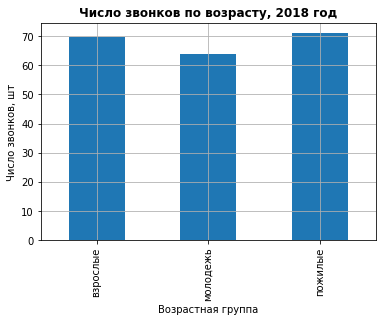

In [127]:
data_short.pivot_table(index='age_group', values='calls_count').plot(
    grid=True, figsize=(6,4), kind='bar', legend=False
)
plt.title("Число звонков по возрасту, 2018 год", fontweight='bold', size='large')
plt.ylabel("Число звонков, шт")
plt.xlabel("Возрастная группа")
plt.show()

Моложежь говорит в среднем чуть меньше, но в целом данные похожи. Переходим к аналитеке интернета.

### Анализ расхода трафика интернета

In [128]:
data_smart['internet_mb_used'].describe()

count     2230.000000
mean     16221.910762
std       5886.299627
min          0.000000
25%      12645.250000
50%      16529.000000
75%      20068.000000
max      38610.000000
Name: internet_mb_used, dtype: float64

In [129]:
data_smart_short['internet_mb_used'].describe()

count     1857.000000
mean     17573.408724
std       4903.668562
min       2003.000000
25%      14170.000000
50%      17341.000000
75%      20723.000000
max      38610.000000
Name: internet_mb_used, dtype: float64

In [130]:
np.var(data_smart_short['internet_mb_used'])

24033016.541076295

In [131]:
data_smart_short['mb_per_month_included'].mean()

15360.0

Однозначно видим, что первый и послений месяц тянет вниз наши значения.
Итак, в тарифе SMART по очищенным данным:
- среднее 175730 MB, медиана 17341 MB, дисперсия почти 24 млн MB в квадрате, стандартное отклонение 4903 MB мин.

Наблюдаем небольшой перерасход относительно лимита в 15360. Посмотрим на распределение.

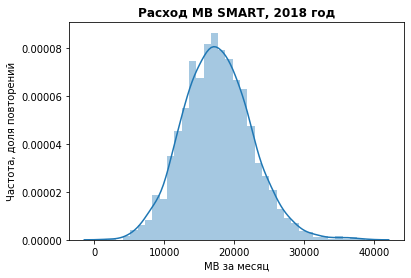

In [132]:
plt.title("Расход MB SMART, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, доля повторений")

sns.distplot(a=data_smart_short['internet_mb_used'], kde=True, rug=False, axlabel="MB за месяц")
plt.show()

Да, пик действительно чуть больше смещен к 20000, чем к 10000. Возможно лимит стоит немного повысить.

Постмотрим на Ultra.

In [133]:
data_ultra['internet_mb_used'].describe()

count      986.000000
mean     19467.137931
std      10110.255401
min          0.000000
25%      11761.000000
50%      19320.000000
75%      26860.250000
max      49789.000000
Name: internet_mb_used, dtype: float64

In [134]:
data_ultra_short['internet_mb_used'].describe()

count      823.000000
mean     21214.109356
std       9478.163993
min          0.000000
25%      14510.500000
50%      20808.000000
75%      27770.500000
max      49789.000000
Name: internet_mb_used, dtype: float64

In [135]:
np.var(data_ultra_short['internet_mb_used'])

89726436.43761599

In [136]:
data_ultra_short['mb_per_month_included'].mean()

30720.0

Однозначно видим, что первый и послений месяц тянет вниз наши значения.
Итак, в тарифе ULTRA по очищенным данным:
- среднее 21214 MB, медиана 20808 MB, дисперсия почти 89 млн MB в квадрате, стандартное отклонение 9478 MB мин.

Наблюдаем недорасход относительно лимита в 30720. Хотя в этот раз нашелся максимум, что превзошел лимит. Посмотрим на распределение.

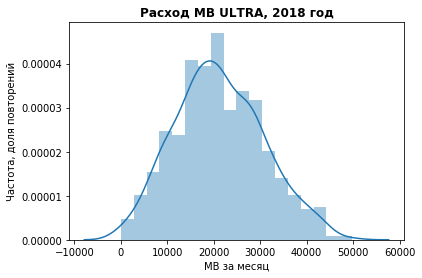

In [137]:
plt.title("Расход MB ULTRA, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, доля повторений")

sns.distplot(a=data_ultra_short['internet_mb_used'], kde=True, rug=False, axlabel="MB за месяц")
plt.show()

Пик однозначно около 20 тыс, но и у 30 тыс есть небольшой пик. Как видно выше, один из квантилей близок к 28 тыс. В данном случае тариф ultra выглядит лучше.

Посмотрим на распределние внутри возрастных групп.

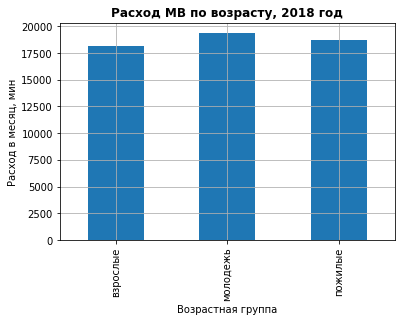

In [138]:
data_short.pivot_table(index='age_group', values='internet_mb_used').plot(
    grid=True, figsize=(6,4), kind='bar', legend=False
)
plt.title("Расход MB по возрасту, 2018 год", fontweight='bold', size='large')
plt.ylabel("Расход в месяц, мин")
plt.xlabel("Возрастная группа")
plt.show()

Опять похоже между собой, но тут молодежь чуть опережает остальные группы.

### Анализ расхода cообщений

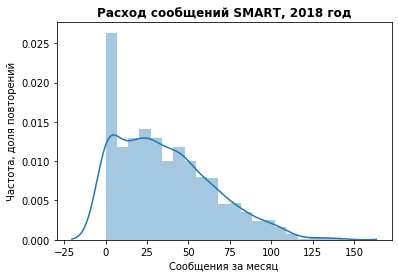

In [139]:
plt.title("Расход сообщений SMART, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, доля повторений")

sns.distplot(a=data_smart_short['messages_count'], kde=True, rug=False, axlabel="Сообщения за месяц")
plt.show()

Итак, видим большой пик в 0. Многим не интересна эта функция. Давайте посмотрим на данные без 0.

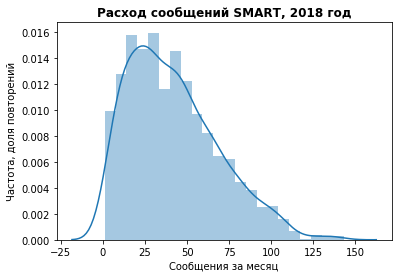

In [140]:
plt.title("Расход сообщений SMART, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, доля повторений")

sns.distplot(a=data_smart_short.query('messages_count != 0')['messages_count'], kde=True, rug=False, axlabel="Сообщения за месяц")
plt.show()

In [141]:
data_smart.query('messages_count != 0')['messages_count'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages_count, dtype: float64

In [142]:
data_smart_short.query('messages_count != 0')['messages_count'].describe()

count    1611.000000
mean       41.718808
std        26.849056
min         1.000000
25%        21.000000
50%        38.000000
75%        59.000000
max       143.000000
Name: messages_count, dtype: float64

In [143]:
np.var(data_smart_short.query('messages_count != 0')['messages_count'])

720.4243451966057

In [144]:
data_smart['messages_included'].mean()

50.0

Smart: среднее 41.7 сообщений, медиана 38 сообщений, 720 дисперсия сообщений в квадрате, стандартное отклонение почти 29 сообщений.

Лимит в 50 сообщей выбран удачно.

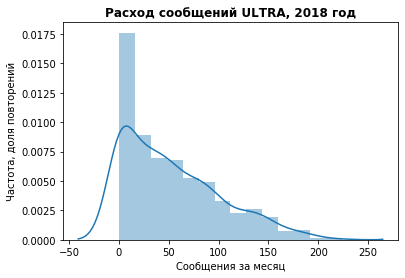

In [145]:
plt.title("Расход сообщений ULTRA, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, доля повторений")

sns.distplot(a=data_ultra_short['messages_count'], kde=True, rug=False, axlabel="Сообщения за месяц")
plt.show()

Тоже пик в 0, посмотрим без него.

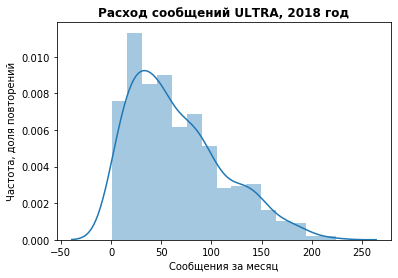

In [146]:
plt.title("Расход сообщений ULTRA, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, доля повторений")

sns.distplot(a=data_ultra_short.query('messages_count != 0')['messages_count'], kde=True, rug=False, axlabel="Сообщения за месяц")
plt.show()

In [147]:
data_ultra.query('messages_count != 0')['messages_count'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: messages_count, dtype: float64

In [148]:
data_ultra_short.query('messages_count != 0')['messages_count'].describe()

count    666.000000
mean      65.515015
std       46.281037
min        1.000000
25%       28.000000
50%       55.000000
75%       94.000000
max      224.000000
Name: messages_count, dtype: float64

In [149]:
np.var(data_ultra_short.query('messages_count != 0')['messages_count'])

2138.7182430177922

In [150]:
data_ultra['messages_included'].mean()

1000.0

Итак, филаньно опять опираемся на очищенные данные.
Ultra: среднее 65 сообщений, медиана 55 сообщений, 2138 дисперсия сообщений в квадрате, стандартное отклонение 46.

Лимит в 1000 сообщений очень завышен. Нашли второй существенный фактор, из-за которого могут уходить пользователи.

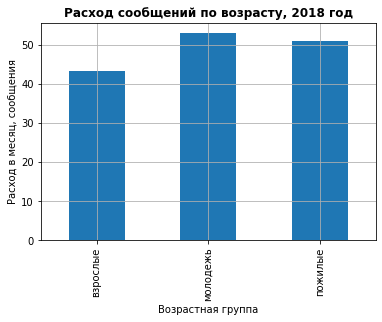

In [151]:
data_short.query('messages_count != 0').pivot_table(index='age_group', values='messages_count').plot(
    grid=True, figsize=(6,4), kind='bar', legend=False
)
plt.title("Расход сообщений по возрасту, 2018 год", fontweight='bold', size='large')
plt.ylabel("Расход в месяц, сообщения")
plt.xlabel("Возрастная группа")
plt.show()

Молодежь пишет больше всего сообщений в месяц (более 50), а взрослые меньше всего (около 40). Вероятно внуки и внучки общаются с бабушками и дедушками по смс. Когда их мамы и папы предпочитают общаться по телефону со старшим поколением, как видно из анализа потраченных минут.

### Анализ выручки

Теперь посмотрим еще и на распределение выручки. Для начала посмотрим на среднюю по клиенту и общую выручку за 2018 год по нашим тарифам.

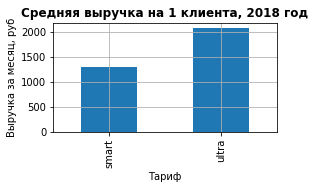

In [152]:
data.pivot_table(index='tariff', values='revenue', aggfunc='mean').plot(
    grid=True, figsize=(4,2), kind='bar', legend=False
)
plt.title("Средняя выручка на 1 клиента, 2018 год", fontweight='bold', size='large')
plt.ylabel("Выручка за месяц, руб")
plt.xlabel("Тариф")
plt.show()

#### data.pivot_table(index='tariff', values='revenue', aggfunc='mean')

Средняя выручка на 1 клиента у smart значительно меньше (1,3 тыс руб и 2 тыс). Как жаль, ведь выше мы видили насколько этот тариф лучше для клиентов. Может быть все-таки общая выручка ведет себя иначе.

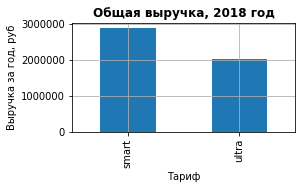

In [153]:
data.pivot_table(index='tariff', values='revenue', aggfunc='sum').plot(
    grid=True, figsize=(4,2), kind='bar', legend=False
)
plt.title("Общая выручка, 2018 год", fontweight='bold', size='large')
plt.ylabel("Выручка за год, руб")
plt.xlabel("Тариф")
plt.show()

In [154]:
data.pivot_table(index='tariff', values='revenue', aggfunc='sum')

,revenue
tariff,
smart,2886301.0
ultra,2041950.0


Да, не смотря на разницу в выручке на 1 клиента, общая выручка за год больше у smart (2,8 млн к 2 млн). Этот тариф действительно пользуется большим спросом.  А если посчитать потенциальную выручку за 1 месяц по активным клиентам на конец года (которые на момент декабря остались с нами). Возможно разница станет еще заметнее?

Возьмем очищенные данные и только по тем пользователям, что не ушли от нас. 

In [155]:
revenue_forecast = data_short.query('churn_month != 0').pivot_table(
    index='tariff', values='revenue', aggfunc='mean'
).reset_index()

revenue_forecast.columns = ['tariff','revenue_mean']

revenue_forecast

,tariff,revenue_mean
0,smart,1414.955224
1,ultra,2206.250000


Добавим сюда количество активных клиентов, умножим и получим потенциальную выручку за месяц.

In [156]:
clients_end_of_2018 = users.query('churn_date.isnull()').pivot_table(
    index='tariff', values='user_id', aggfunc='count'
).reset_index()

clients_end_of_2018.columns = ['tariff','clients_count']

clients_end_of_2018

,tariff,clients_count
0,smart,328
1,ultra,134


In [157]:
revenue_forecast = pd.merge(revenue_forecast, clients_end_of_2018, how='outer')

revenue_forecast['revenue_month'] = revenue_forecast['clients_count']*revenue_forecast['revenue_mean']

revenue_forecast

,tariff,revenue_mean,clients_count,revenue_month
0,smart,1414.955224,328,464105.313433
1,ultra,2206.250000,134,295637.500000


Успех! Итого по активным клиентам на конец 2018 года потенциальная суммарная месячная выручка у клиентов Smart = 464 тыс руб, в у клиентов Ultra всего 295 тыс руб.

Тариф Smart однозначно выгоднее для компании.

## Шаг: Проверка гипотез
На этом шаге мы проверим следующие гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Для данной гипотезы у нас уже есть отобранные выборки: data_smart_short и data_ultra_short. Опять же берем данные без первых и последних месяцев. Так как мы видели выше они занижают значения потребляемых услуг.

Данная гипотеза - это гипотеза о неравенстве средних двух генеральных совокупностей. Для начала зададим нулевую гипотезу H₀: средние у совокупностей равны.

Тогда наша гипотеза о неравенстве средних - это альтернативная гипотеза H₁.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). Он как раз поможет нам понять зависимость. 

Пороговое значение alpha зададим как 0.05 (критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу). Мы объявили его в самом начале.

Единственное необходимо понять насколько различаются дисперсии в выборках. Кажется, из предварительного анализы выше, они должны расходиться. Проверим это. А также вспомним этот график, почему мы думали, что она отличается (2 пика в совсем разных местах):

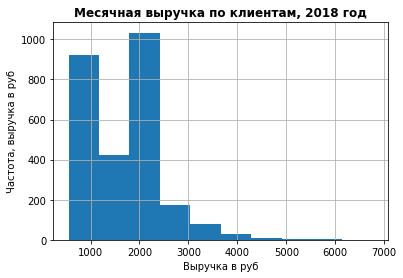

In [158]:
data_short['revenue'].hist()
plt.title("Месячная выручка по клиентам, 2018 год", fontweight='bold', size='large')
plt.ylabel("Частота, выручка в руб")
plt.xlabel("Выручка в руб")
plt.show()

In [159]:
np.var(data_smart_short['revenue'])

691788.6562817082

In [160]:
np.var(data_ultra_short['revenue'])

167594.80252580356

Дисперсия отличается в разы. Параметр equal_var скорее всего зададим как False. Но для начала попрбуем еще применить тест Левене для проверки не на глаз.

In [161]:
levene_result = st.levene(data_smart_short['revenue'], data_ultra_short['revenue'])
levene_result

LeveneResult(statistic=498.46969922592643, pvalue=2.1069867675526538e-101)

In [162]:
def equal_var_result(pvalue):
    if pvalue < alpha:
        return 'Берем equal_var=False'
    else:
        return 'Берем equal_var=True'

equal_var_result(levene_result.pvalue)

'Берем equal_var=False'

P-значение получилось очень маленькое! pvalue=2.1069867675526538e-101, однозначно equal_var=False. Приступим к t тесту.

In [163]:
sample_1 = data_smart_short['revenue']
sample_2 = data_ultra_short['revenue']

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
results.pvalue

1.642911141789544e-154

In [164]:
def hypothesis_result(pvalue):
    if pvalue < alpha:
        return 'Отвергаем нулевую гипотезу'
    else:
        return 'Не получилось отвергнуть нулевую гипотезу'

hypothesis_result(results.pvalue)

'Отвергаем нулевую гипотезу'

Наш предварительный анализ подтвердился, ура!

Нулевую гипотезу, что средние равны - отвергаем. Поэтому нашу, альтернативную гипотезу не отвергаем. Получилось отвергнуть нулевую гипотезу что, выручки на тарифах одинаковые. Поэтому средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Поэтому нашу, альтернативную гипотезу не отвергаем.

### Гипотезасредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Данная гипотеза - это также гипотеза о неравенстве средних двух генеральных совокупностей. Зададим нулевую гипотезу H₀: средние у совокупностей по выручке по Москве и другим городам равны.

Тогда наша гипотеза о неравенстве средних по выручке по Москве и другим городам - это альтернативная гипотеза H₁.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим опять метод scipy.stats.ttest_ind (array1, array2, equal_var). Он как раз поможет нам понять зависимость. 

Пороговое значение alpha оставим как 0.05. 

In [165]:
np.var(data_short.query('city == "Москва"')['revenue'])

539501.611239126

In [166]:
np.var(data_short.query('city != "Москва"')['revenue'])

649871.0916342799

Посмотрели на дисперсии, уже не такое однозначное несоответсвие. Применим тест Левене.

In [167]:
levene_result_2 = st.levene(
    data_short.query('city == "Москва"')['revenue'], data_short.query('city != "Москва"')['revenue']
)
levene_result_2

LeveneResult(statistic=8.537228881831384, pvalue=0.003508673119671225)

In [168]:
equal_var_result(levene_result_2.pvalue)

'Берем equal_var=False'

И все-таки берем equal_var=False

In [169]:
sample_1_2 = data_short.query('city != "Москва"')['revenue']
sample_2_2 = data_short.query('city == "Москва"')['revenue']

results_2 = st.ttest_ind(sample_1_2, sample_2_2, equal_var=False)
results_2.pvalue

0.37585779611039294

In [170]:
hypothesis_result(results_2.pvalue)

'Не получилось отвергнуть нулевую гипотезу'

Не получилось отвергнуть нулевую гипотезу, вероятно месячная выручка в Москве и др. городах не сильно различается. Что и видно, если посмотреть на средние.

In [171]:
data_short.query('city != "Москва"')['revenue'].mean()

1615.4584290307762

In [172]:
data_short.query('city == "Москва"')['revenue'].mean()

1648.2942345924453

Но ведь возможно влияет разброс между тарифами, про который мы выяснили в 1 гипотезе. Т Попробуем оценить все в рамках каждого тарифа, так будет более полноценная картина.

In [173]:
levene_result_3 = st.levene(
    data_smart_short.query('city != "Москва"')['revenue'], data_smart_short.query('city == "Москва"')['revenue']
)
levene_result_3

LeveneResult(statistic=2.067358144094806, pvalue=0.15065066404794775)

In [174]:
equal_var_result(levene_result_3.pvalue)

'Берем equal_var=True'

Ничего себе, если смотреть в рамках тарифа то, выборки становятся более похожими, что даже equal_var=True сможем взять.

In [175]:
sample_1_3 = data_smart_short.query('city != "Москва"')['revenue']
sample_2_3 = data_smart_short.query('city == "Москва"')['revenue']

results_3 = st.ttest_ind(sample_1_3, sample_2_3, equal_var=True)
results_3.pvalue

0.3988567148579695

In [176]:
hypothesis_result(results_3.pvalue)

'Не получилось отвергнуть нулевую гипотезу'

По smart выручки также примерно не различаются между регионами и Москвой.

In [177]:
levene_result_4 = st.levene(
    data_ultra_short.query('city != "Москва"')['revenue'], data_ultra_short.query('city == "Москва"')['revenue']
)
levene_result_4

LeveneResult(statistic=0.01304482499686621, pvalue=0.9090961230430058)

In [178]:
equal_var_result(levene_result_4.pvalue)

'Берем equal_var=True'

In [179]:
sample_1_4 = data_ultra_short.query('city != "Москва"')['revenue']
sample_2_4 = data_ultra_short.query('city == "Москва"')['revenue']

results_4 = st.ttest_ind(sample_1_4, sample_2_4, equal_var=True)
results_4.pvalue

0.9090961230430137

In [180]:
hypothesis_result(results_4.pvalue)

'Не получилось отвергнуть нулевую гипотезу'

Бинго, если сравнивать подмножества в Москве и городах в рамках тарифов, но нулевая гипотеза о равенстве средних не модет быть отвергнута. Да еще и с такими p-значениями: 0.39 и 0.90.

## Шаг: Общий вывод
В данном проекте анализировалась выборка пользователей по 2 тарифам оператора: smart и ultra.

Итого по результатам анализа данных можно выявить следующие закономерности:
 - Интересное наблюдение по выборке клиентов. В нашу выборку попали клиенты, которые подкючились к тарифам в 2018 году. Всего 500 пользователей, из них 38 человек с датой окончания тарифа - вероятно ушли от нашего оператора.
 - Тариф smart популярнее больше чем в 2 раза! 350 подключений к 150 у ultra за 2018 год.
 - А вот отключения происходят в более равных пропорциях. Из 38 пользователей 23 ушли со smart, и 15 c ultra. 6,5% и 10% доля уходов от новых подключений за 2018 год соответственно.
 
- Самая популярная услуга - интеренет. Месяцов (точнее комбинаций клиент-месяц), когда ей пользовались клиенты больше всего (3202)! А самая невостребованная - сообщения (2717). У звонков же почетное второе место (3174).
 
Анализ тарифов и ключевых показателей:

Зафиксируем ключевые показатели по <b>расходу минут</b> (берем очищенные данные):
- <b>Smart:</b> среднее 453 мин, медиана 454 минут, 31070 дисперсия минут в квадрате, стандартное отклонение 176 мин.
- <b>Ultra:</b> среднее 572 мин, медиана 565 минут, 94282 дисперсия минут в квадрате, стандартное отклонение 307 мин.
- У тарифа Smart с количеством минут все хорошо. В 500 минутах находится примерный пик расходов минут пользователями. А медиана и среднее почти совпадают и тоже находятся около 500: 453 и 454 минут соотвественно.
- Абсолютно противоположная картина с тарифом ultra. Среднее потребление относительно ненамного превосходит среднее в тарифе smart (на 25%): 572 мин, а вот включенные минуты в 5 раз при этом больше - 3000 мин. Даже максимум расхода, который случился в 2018 году, в 2 раза меньше лимита: 1673 минут. Медиана опять близка к среднему (565), а пик распределения расхода минут находится также примерно у 600 мин. Их и нужно рекомендовать для установки базовых на данный тариф. Это повысит удовлетворенность клиентов.

- По возрастным группам - все похоже в среднем. Молодежь разговаривает чуть меньше остальных (чуть больше 1 часа в месяц). А взрослые и пожилые по 70 минут.

Зафиксируем ключевые показатели по <b>расходу интернета MB</b> (берем очищенные данные):
- <b>Smart:</b> среднее 175730 MB, медиана 17341 MB, дисперсия почти 24 млн MB в квадрате, стандартное отклонение 4903 MB мин. Наблюдаем небольшой перерасход относительно лимита в 15360 MB.
- <b>Ultra:</b> среднее 21214 MB, медиана 20808 MB, дисперсия почти 89 млн MB в квадрате, стандартное отклонение 9478 MB мин. Наблюдаем недорасход относительно лимита в 30720. Хотя в этот раз нашелся максимум, что превзошел лимит.
- Опять возрастные группы похожи между собой по поведению (около 18-19 тыс MB), но тут молодежь чуть опережает остальные группы.

Зафиксируем ключевые показатели по <b>расходу сообщений</b> (берем очищенные данные):
- <b>Smart:</b> среднее 41.7 сообщений, медиана 38 сообщений, 720 дисперсия сообщений в квадрате, стандартное отклонение почти 29 сообщений. Лимит в 50 сообщей выбран удачно.
- <b>Ultra:</b> среднее 65 сообщений, медиана 55 сообщений, 2138 дисперсия сообщений в квадрате, стандартное отклонение 46. Лимит в 1000 сообщений очень завышен. Нашли второй существенный фактор, из-за которого могут уходить пользователи.
- Молодежь пишет больше всего сообщений в месяц (более 50), а взрослые меньше всего (около 40). Вероятно внуки и внучки общаются с бабушками и дедушками по смс. Когда их мамы и папы предпочитают общаться по телефону со старшим поколением, как видно из анализа потраченных минут.

Зафиксируем ключевые выводы по распределению выручки:
- Средняя выручка на 1 клиента у smart значительно меньше (1,3 тыс руб и 2 тыс).
- Но, не смотря на разницу в выручке на 1 клиента, общая выручка за 2018 год больше у smart (2,8 млн к 2 млн).
- А если посчитать потенциальный прогноз по активным клиентам на конец 2018 года на следующий год потенциальная суммарная месячная выручка у клиентов Smart = 464 тыс руб, в у клиентов Ultra всего 295 тыс руб.
- Тариф Smart однозначно выгоднее для компании.

Проверка гипотез:
- <b>Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.</b> Получилось отвергнуть нулевую гипотезу что, выручки на тарифах одинаковые (p-value после t теста очень мало: 1.642911141789544e-154). Поэтому средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Поэтому нашу, альтернативную гипотезу не отвергаем.
- <b>Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</b> Не получилось отвергнуть нулевую гипотезу, вероятно месячная выручка в Москве и др. городах не различается, если сравнивать всю информацию по всем тарифам (результат t теста: р-значение - 0,37). Поэтому нашу альтернативную гипотезу не можем поддтвердить.
- А если проверить ту же нулевую гипотезу для Москвы и других городов а разрезе тарифов, то ее нельзя опровергнуть даже с более сильными показателями p-значений (0,39 и 0,9). Выручка внутри тарифов между Москвой и другими городами вероятно совпадает.


Важный момент и главный итог, который хочется подчеркнуть еще раз:
- Очевидно, что у тарифа ultra есть проблемы. Клиенты уходят чаще с него, его выбирают реже. Лимиты на услуги завышены. Потенциал для улучшения большой.
- Тариф smart однозначно выгоднее для компании, потенциальная суммарная месячная выручка по активным клиентам на конец 2018 Smart = 464 тыс руб, в у клиентов Ultra всего 295 тыс руб. Даже общие показатели за 2018 год обогнали ultra, несмотря на то6 что на 1 клиента выручка у ultra больше.

## Чек-лист готовности проекта
- [x]  открыты файлы;
- [x]  файлы изучены;
- [x]  определены пропущенные значения и описаны возможные причины появления;
- [x]  заполнены пропущенные значения и есть объяснение как, если это необходимо;
- [x]  изменены типы данных и есть пояснение почему;
- [x]  проверены и удалены дубликаты;
- [x]  есть ответ на вопрос: "Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?";
- [x]  посчитаны: среднее количество, дисперсия и стандартное отклонение. Построены гистограммы;
- [x]  проверена гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается";
- [x]  проверена гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.